<a href="https://colab.research.google.com/github/tanpharamut/KKU_data_mining/blob/master/Kmeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=300, centers=3, n_features=2, random_state=6)

In [3]:
X.shape

(300, 2)

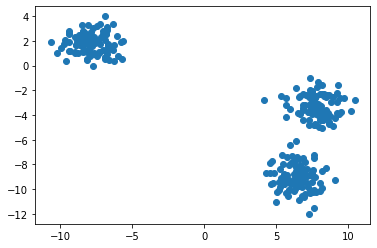

In [4]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0],X[:,1])

## Import

In [5]:
from sklearn.cluster import KMeans

## Define

In [15]:
KMclust = KMeans(n_clusters=5)

## Train

In [16]:
KMclust.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Predict

In [17]:
label = KMclust.predict(X)

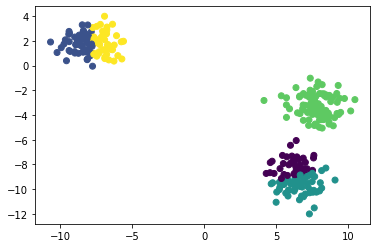

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=label)

## Color quantization ()

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
path = '/content/drive/My Drive/DWDM_material'


In [21]:
import cv2
import os

In [24]:
img = cv2.imread(os.path.join(path,'original.jpg'))

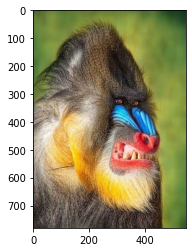

In [25]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

In [26]:
RGB_img.shape

(780, 547, 3)

## count unique colors

In [27]:
import numpy as np

In [28]:
np.unique(RGB_img).shape

(256,)

## Use K-means to reduce color from 256 colors to 8 colors

In [29]:
#Define
myQuantize = KMeans(n_clusters=8)

In [32]:
img_row = np.reshape(RGB_img,(780*547,3))
img_row

array([[ 66, 104,  55],
       [ 67, 105,  56],
       [ 68, 104,  56],
       ...,
       [ 49,  90,  34],
       [ 49,  90,  34],
       [ 49,  90,  34]], dtype=uint8)

In [33]:
#Trian
myQuantize.fit(img_row)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [34]:
#Predict
res = myQuantize.predict(img_row)

In [35]:
res

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

## Get cluster centers

In [36]:
Clus_cen = myQuantize.cluster_centers_
Clus_cen

array([[165.44015469, 142.80971421, 122.26761056],
       [145.21273214, 154.77906977,  67.97600524],
       [ 87.89649489,  74.95445473,  57.41498821],
       [111.97988702, 121.6152304 ,  66.97520305],
       [229.96019828, 204.45920896, 161.41159686],
       [230.62521025, 159.00069259,  63.30579466],
       [ 45.98639267,  38.1221297 ,  28.0294298 ],
       [ 49.78698945, 150.22004328, 206.59926968]])

In [37]:
Clus_cen.shape

(8, 3)

## Map color name back to image

In [38]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
    for j in range(RGB_img.shape[1]):
        new_img[i,j,:] = Clus_cen[myQuantize.predict([RGB_img[i,j,:]]), :]


In [39]:
new_img

array([[[87.89649489, 74.95445473, 57.41498821],
        [87.89649489, 74.95445473, 57.41498821],
        [87.89649489, 74.95445473, 57.41498821],
        ...,
        [45.98639267, 38.1221297 , 28.0294298 ],
        [45.98639267, 38.1221297 , 28.0294298 ],
        [45.98639267, 38.1221297 , 28.0294298 ]],

       [[87.89649489, 74.95445473, 57.41498821],
        [87.89649489, 74.95445473, 57.41498821],
        [87.89649489, 74.95445473, 57.41498821],
        ...,
        [45.98639267, 38.1221297 , 28.0294298 ],
        [45.98639267, 38.1221297 , 28.0294298 ],
        [45.98639267, 38.1221297 , 28.0294298 ]],

       [[87.89649489, 74.95445473, 57.41498821],
        [87.89649489, 74.95445473, 57.41498821],
        [87.89649489, 74.95445473, 57.41498821],
        ...,
        [45.98639267, 38.1221297 , 28.0294298 ],
        [45.98639267, 38.1221297 , 28.0294298 ],
        [45.98639267, 38.1221297 , 28.0294298 ]],

       ...,

       [[45.98639267, 38.1221297 , 28.0294298 ],
        [45

In [40]:
new_img_ = new_img/255

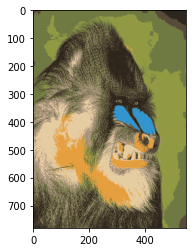

In [41]:
plt.imshow(new_img_)